In [2]:

import pandas as pd
columnNames = ["Class-Name", "handicapped-infants", "water-project-cost-sharing",
                                                  "adoption-of-the-budget-resolution", "physician-fee-freeze",
                                                  "el-salvador-aid", "religious-groups-in-schools",
                                                  "anti-satellite-test-ban", "aid-to-nicaraguan-contras", "mx-missile",
                                                  "immigration", "synfuels-corporation-cutback", "education-spending",
                                                  "superfund-right-to-sue", "crime", "duty-free-exports",
                                                  "export-administration-act-south-africa"]
votes = pd.read_csv("/Users/alexdayma/Downloads/feature_selection/datasets/house-votes-84.data", names= columnNames, na_values=["?"])
votes = votes.dropna()
votes = votes.replace("y", 1)
votes = votes.replace("n", 0)
votes = votes.replace("republican", 1)
votes = votes.replace("democrat", 0)

y = votes["Class-Name"]
X = votes.drop(["Class-Name"], axis=1)  
votes.head()


,Class-Name,handicapped-infants,water-project-cost-sharing,adoption-of-the-budget-resolution,physician-fee-freeze,el-salvador-aid,religious-groups-in-schools,anti-satellite-test-ban,aid-to-nicaraguan-contras,mx-missile,immigration,synfuels-corporation-cutback,education-spending,superfund-right-to-sue,crime,duty-free-exports,export-administration-act-south-africa
5,0,0,1,1,0,1,1,0,0,0,0,0,0,1,1,1,1
8,1,0,1,0,1,1,1,0,0,0,0,0,1,1,1,0,1
19,0,1,1,1,0,0,0,1,1,1,0,1,0,0,0,1,1
23,0,1,1,1,0,0,0,1,1,1,0,0,0,0,0,1,1
25,0,1,0,1,0,0,0,1,1,1,1,0,0,0,0,1,1



# Filtre
La méthode à base de filtre accomplit la tâche de sélection d’attributs sans faire appel au
modèle utilisé lors de l’apprentissage, elle s’inscrit en amont de la phase d’entrainement
du modèle et s’appuie fortement sur des techniques de statistiques descriptives, telle que
la corrélation entre les attributs et la variable à prédire, les tests statistiques (« khi-deux »
etc…).
# 1 Corelation
La corrélation en statistique est une métrique qui nous indique à quelle point deux
variables statistiques ou aléatoires sont liées, afin d’éxploiter cette propriété on commance
par calculer les coefficients de corrélation entres les attributs et la variable de sortie, et on
affiche le résultat en valeur absolue (plus la valeur est proche de 1 plus les variables sont
corrélées)

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt
get_ipython().magic('matplotlib inline')


corrmat = votes.corr()
top_corr_features = corrmat.index
cor_target = abs(corrmat["Class-Name"])

dfscores = pd.DataFrame(cor_target[1:])
dfscores.columns = ['correlation with Class-Name']
print(dfscores.nlargest(16, 'correlation with Class-Name'))


                                        correlation with Class-Name
physician-fee-freeze                                       0.940424
el-salvador-aid                                            0.754347
education-spending                                         0.722820
adoption-of-the-budget-resolution                          0.697041
aid-to-nicaraguan-contras                                  0.681100
crime                                                      0.660487
mx-missile                                                 0.650100
superfund-right-to-sue                                     0.553449
duty-free-exports                                          0.501571
anti-satellite-test-ban                                    0.497611
religious-groups-in-schools                                0.444158
handicapped-infants                                        0.380551
synfuels-corporation-cutback                               0.367992
export-administration-act-south-africa          

On remarque que l’attribut « physician-fee-freeze » est très fortement corrélé avec la variable
de sortie, de plus d’autres attributs révèlent des valeurs dépassant les 0.6, ceci nous pousse
d’un coté à éliminer les attributs relevant un faible coefficient, et d’un autres coté à dresser la
matrice des corrélations entre le reste des variables afin de voir si celle-ci sont corrélé entre
eux.

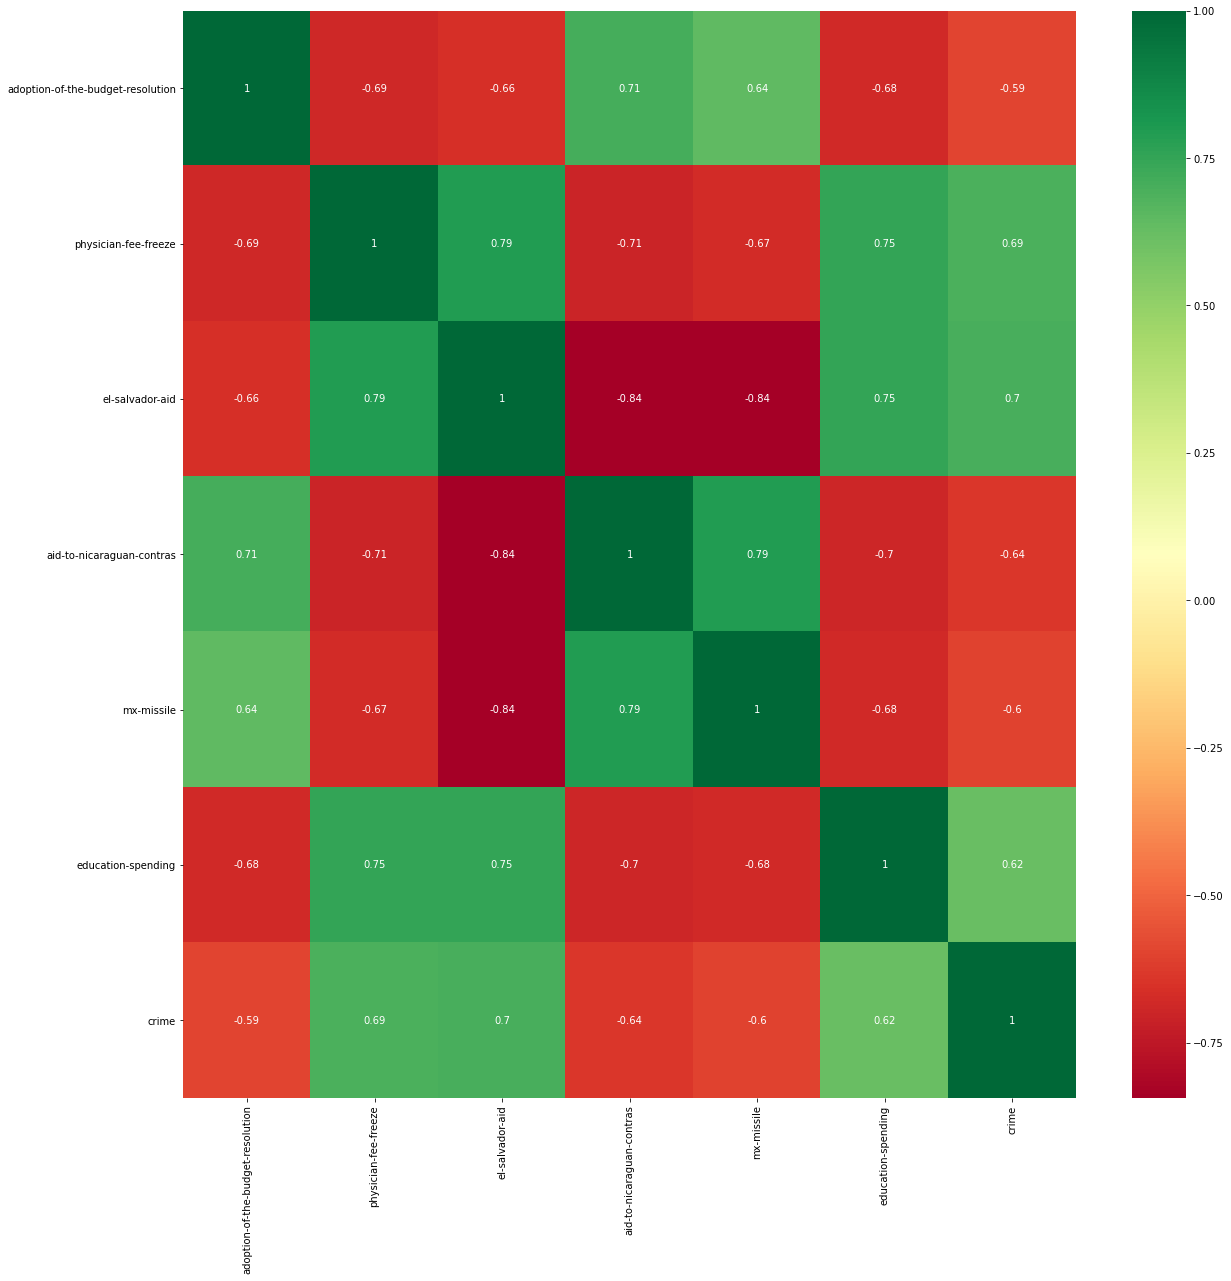

In [4]:

#Selecting highly correlated features
relevant_features = cor_target[cor_target>0.65 ]
corInterFeatures = votes[[*relevant_features.index[1:]]].corr()
plt.figure(figsize=(20,20))

#plot heat map
# sns.heatmap(votes[top_corr_features].corr(),annot=True,cmap="RdYlGn")
sns.heatmap(corInterFeatures,annot=True,cmap="RdYlGn")
plt.show()
# print(relevant_features.index)

La matrice ci-dessus nous indique clairement que les attributs restants sont fortement
corrélés avec l’attribut « physician-fee-freeze », de plus ce dernier est parfaitement corrélé
avec la variable de sortie, donc on peut dire que cette méthode nous amène à ne garder que
l’attribut « physician-fee-freeze ».

# 2 SelectKBest

In [3]:
from sklearn.feature_selection import SelectKBest, chi2

SelectKBest = SelectKBest(chi2, k=2)
X_new = SelectKBest.fit_transform(X, y)
print(['{:f}'.format(item) for item in SelectKBest.scores_])

dfscores = pd.DataFrame(SelectKBest.scores_)
dfcolumns = pd.DataFrame(X.columns)
#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns
print(featureScores.nlargest(16,'Score'))  



['19.695390', '0.053160', '52.959418', '105.243389', '59.180145', '16.373923', '26.742552', '52.420359', '50.292987', '0.182945', '20.583572', '64.786052', '32.162118', '36.208134', '36.729682', '5.432156']
                                     Specs       Score
3                     physician-fee-freeze  105.243389
11                      education-spending   64.786052
4                          el-salvador-aid   59.180145
2        adoption-of-the-budget-resolution   52.959418
7                aid-to-nicaraguan-contras   52.420359
8                               mx-missile   50.292987
14                       duty-free-exports   36.729682
13                                   crime   36.208134
12                  superfund-right-to-sue   32.162118
6                  anti-satellite-test-ban   26.742552
10            synfuels-corporation-cutback   20.583572
0                      handicapped-infants   19.695390
5              religious-groups-in-schools   16.373923
15  export-administrati

# Embedded methods
Le principe de ces méthodes est de faire un compromis entre l’approche « Filter » et
l’approche « wrapper » qui suit cette pertie. La sélection d’attributs ce fait pendant la phase
d’apprentissage en jouant sur la pondération des attributs au niveau du modèle de tel sorte à
avoir le poids associer aux attributs important largement supérieur au poids des attributs non
significatif et facultatif (la régularisation).

## Regularization algorithms: Ridge Regression





In [4]:
from sklearn.linear_model import Ridge
import numpy as np
ridge = Ridge(alpha=0.4)
ridge.fit(X,y)
def pretty_print_coefs(coefs, names = None, sort = False):
    if names == None:
        names = ["X%s" % x for x in range(len(coefs))]
    lst = zip(coefs, names)
    if sort:
        lst = sorted(lst,  key = lambda x:-np.abs(x[0]))
    return "".join("%s * %s\n" % (round(coef, 3), name)
                                   for coef, name in lst)
print (pretty_print_coefs(ridge.coef_,sort=True,names=columnNames[1:]))


0.811 * physician-fee-freeze
-0.117 * adoption-of-the-budget-resolution
-0.106 * synfuels-corporation-cutback
0.052 * export-administration-act-south-africa
0.038 * immigration
0.036 * anti-satellite-test-ban
0.034 * superfund-right-to-sue
-0.03 * mx-missile
0.027 * el-salvador-aid
0.025 * duty-free-exports
-0.019 * water-project-cost-sharing
-0.015 * religious-groups-in-schools
0.01 * education-spending
-0.009 * aid-to-nicaraguan-contras
0.008 * handicapped-infants
-0.006 * crime



## Lasso regularization

Best alpha using built-in LassoCV: 0.007678
Best score using built-in LassoCV: 0.897754


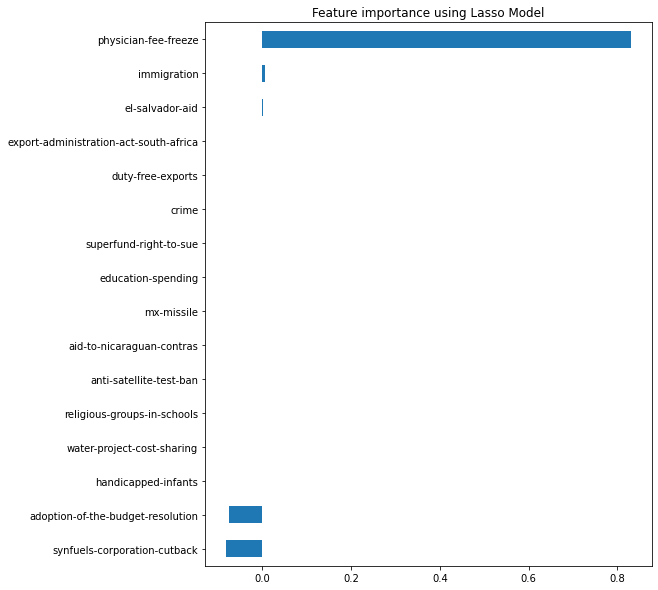

In [5]:
from sklearn.linear_model import LassoCV
reg = LassoCV()
reg.fit(X, y)
print("Best alpha using built-in LassoCV: %f" % reg.alpha_)
print("Best score using built-in LassoCV: %f" %reg.score(X,y))
coef = pd.Series(reg.coef_, index = X.columns)

imp_coef = coef.sort_values()
import matplotlib
matplotlib.rcParams['figure.figsize'] = (8.0, 10.0)
imp_coef.plot(kind = "barh")
plt.title("Feature importance using Lasso Model")
plt.show()

L’exécution des ces deux Algorithmes met en évidence l’importance de l’attribut « physician-fee-
freeze » par rapport au reste des attributs

# Wrapper methods
Dans cette approche on génère des sous ensemble d’attributs et on évalue le modèle après
l’avoir entrainé sur ce sous ensemble, en d’autres termes on utilise la performance en aval
pour sélectionner le meilleur sous ensemble d’attributs, par conséquent cette approche est
plus précise que les précédentes vus que l’on garde le meilleur sous ensemble qui optimise
la précision du modèle.

## Recursive feature elimination with cross-validation
Le principe de cet Algorithme est le même que le classique RFE qui consiste à
générer récursivement les sous-ensembles d’attributs afin de trouver le meilleur qui
puisse optimiser la précision du modèle, mais de plus cette version de l’algorithme
utilise la « cross-validation » afin de trouver le nombre optimal d’attributs

Optimal number of features : 1
selected features are:  ['physician-fee-freeze']
-------------------------------------------------------
                           sorted_features
0                     physician-fee-freeze
1        adoption-of-the-budget-resolution
2             synfuels-corporation-cutback
3                          el-salvador-aid
4                                    crime
5                              immigration
6                       education-spending
7                               mx-missile
8                        duty-free-exports
9              religious-groups-in-schools
10  export-administration-act-south-africa
11                  superfund-right-to-sue
12                 anti-satellite-test-ban
13               aid-to-nicaraguan-contras
14                     handicapped-infants
15              water-project-cost-sharing


/home/yacine/.local/lib/python3.8/site-packages/sklearn/base.py:441: UserWarning: X does not have valid feature names, but RFECV was fitted with feature names
  warnings.warn(
/home/yacine/.local/lib/python3.8/site-packages/sklearn/utils/deprecation.py:103: FutureWarning: The `grid_scores_` attribute is deprecated in version 1.0 in favor of `cv_results_` and will be removed in version 1.2.
  warnings.warn(msg, category=FutureWarning)


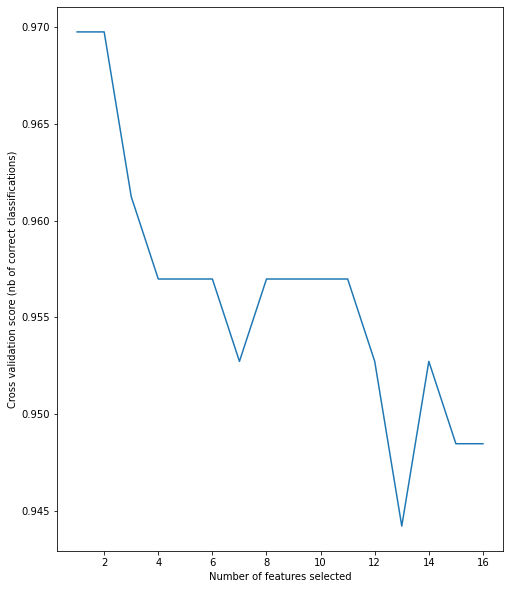

In [30]:
import matplotlib.pyplot as plt
from sklearn.model_selection import StratifiedKFold
from sklearn.feature_selection import RFECV
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression


rfecv = RFECV(estimator=LogisticRegression(), step=1,
              scoring='accuracy')
rfecv.fit(X, y)

print("Optimal number of features : %d" % rfecv.n_features_)
temp = pd.Series(rfecv.support_, index = X.columns)
selected_features_rfecv = temp[temp==True].index
print('selected features are: ', selected_features_rfecv.values)
print('-------------------------------------------------------')

temp = pd.Series(rfecv.ranking_, index = X.columns)
selected_features_rfecv = temp.sort_values().index
dfscores = pd.DataFrame(selected_features_rfecv)
dfscores.columns = ['sorted_features']
print(dfscores)

plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score (nb of correct classifications)")
plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.cv_results_['mean_test_score'])
plt.show()


L’exécution du RFECV nous confirme encore une fois qu’un seul attribut (« physician-fee-
freeze ») suffit pour obtenir une classification avec une précision (Accuracy) optimale.

# Temps d’entrainement 
## Avant la sélection d’attributs

In [34]:

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=40)
model = LogisticRegression()
import time

startTime = time.time()
model.fit(X_train, y_train)
endTime = time.time()
y_train_pred = model.predict(X_train)
h = model.predict(X_test)
print("Test Accuracy before feature selection is ", accuracy_score(y_test, h) * 100)
print("time == {} ms".format((endTime - startTime) * 1000))



Test Accuracy before feature selection is  90.0
time == 10.322093963623047 ms


## Après la sélection d’attributs

In [49]:
X_new = rfecv.transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_new, y, test_size=0.3, random_state=40)
model = LogisticRegression()
import time

startTime = time.time()
model.fit(X_train, y_train)
endTime = time.time()
y_train_pred = model.predict(X_train)
h = model.predict(X_test)
print("Test Accuracy before feature selection is ", accuracy_score(y_test, h) * 100)
print("time == {} ms".format((endTime - startTime) * 1000))


Test Accuracy before feature selection is  95.71428571428572
time == 4.006862640380859 ms
